# <center> Analyse de l'incidence de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

On recupere les données sur le reseau [sentinelle](https://websenti.u707.jussieu.fr/sentiweb/)

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202052          7  11908     8158   15658      18          12         24   
1  202051          7  10564     7574   13554      16          11         21   
2  202050          7   7063     4744    9382      11           7         15   
3  202049          7   5026     3145    6907       8           5         11   
4  202048          7   6683     4312    9054      10           6         14   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [3]:
raw_data.tail()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
1564  199101          7  15565    10271   20859      27          18   
1565  199052          7  19375    13295   25455      34          23   
1566  199051          7  19080    13807   24353      34          25   
1567  199050          7  11079     6660   15498      20          12   
1568  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
1564         36        FR   France  
1565         45        FR   France  
1566         43        FR   France  
1567         28        FR   France  
1568          5        FR   France

On fait une recherche de donnée manquante dans la dataframe.On visuallise les lignes de donnée manquantes

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
data = raw_data.dropna().copy()
data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202052          7  11908     8158   15658      18          12         24   
1  202051          7  10564     7574   13554      16          11         21   
2  202050          7   7063     4744    9382      11           7         15   
3  202049          7   5026     3145    6907       8           5         11   
4  202048          7   6683     4312    9054      10           6         14   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:6])
    w = isoweek.Week(year,week)
    return pd.Period(w.day(0),'W')

data['period'] = [convert_week(yw) for yw in data['week']]
data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202052          7  11908     8158   15658      18          12         24   
1  202051          7  10564     7574   13554      16          11         21   
2  202050          7   7063     4744    9382      11           7         15   
3  202049          7   5026     3145    6907       8           5         11   
4  202048          7   6683     4312    9054      10           6         14   

  geo_insee geo_name                period  
0        FR   France 2020-12-21/2020-12-27  
1        FR   France 2020-12-14/2020-12-20  
2        FR   France 2020-12-07/2020-12-13  
3        FR   France 2020-11-30/2020-12-06  
4        FR   France 2020-11-23/2020-11-29

In [7]:
sorted_data = data.set_index('period').sort_index()
sorted_data.head()

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
1990-12-03/1990-12-09           0          5        FR   France  
1990-12-10/1990-12-16          12         28        FR   France  
1990-12-17/1990-12-23          25         43        FR   France  
1990-12-24/1990-12-30          23         45        FR   France  
1990-12-31/1991-01-06          18         36        FR   France

In [8]:
periods = sorted_data.index
i = 0
for p1, p2 in zip(periods[0:],periods[1:]):
#    if i < 5 :
#        print(p1, p2)
#        i = i + 1
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print()
        print(p1,p2)
        

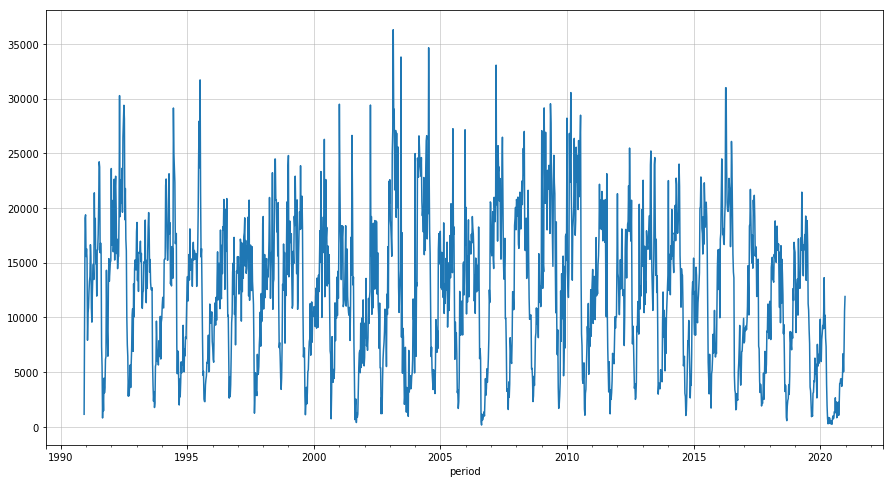

In [9]:
sorted_data['inc'].plot(figsize=(15, 8)).grid(linestyle='-', linewidth=0.5)

In [10]:
mmax = sorted_data['inc'].max()
sorted_data[sorted_data['inc'] == mmax]

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
2003-02-17/2003-02-23  200308          7  36298    22548   50048      61   

                       inc100_low  inc100_up geo_insee geo_name  
period                                                           
2003-02-17/2003-02-23          38         84        FR   France

In [11]:
pd.Period(pd.Timestamp(2000,8,1),'W')

Period('2000-07-31/2000-08-06', 'W-SUN')

In [12]:
first_aout_week = [pd.Period(pd.Timestamp(y,8,1),'w')
                  for y in range(sorted_data.index[0].year,
                                sorted_data.index[-1].year)]

first_aout_week

[Period('1990-07-30/1990-08-05', 'W-SUN'),
 Period('1991-07-29/1991-08-04', 'W-SUN'),
 Period('1992-07-27/1992-08-02', 'W-SUN'),
 Period('1993-07-26/1993-08-01', 'W-SUN'),
 Period('1994-08-01/1994-08-07', 'W-SUN'),
 Period('1995-07-31/1995-08-06', 'W-SUN'),
 Period('1996-07-29/1996-08-04', 'W-SUN'),
 Period('1997-07-28/1997-08-03', 'W-SUN'),
 Period('1998-07-27/1998-08-02', 'W-SUN'),
 Period('1999-07-26/1999-08-01', 'W-SUN'),
 Period('2000-07-31/2000-08-06', 'W-SUN'),
 Period('2001-07-30/2001-08-05', 'W-SUN'),
 Period('2002-07-29/2002-08-04', 'W-SUN'),
 Period('2003-07-28/2003-08-03', 'W-SUN'),
 Period('2004-07-26/2004-08-01', 'W-SUN'),
 Period('2005-08-01/2005-08-07', 'W-SUN'),
 Period('2006-07-31/2006-08-06', 'W-SUN'),
 Period('2007-07-30/2007-08-05', 'W-SUN'),
 Period('2008-07-28/2008-08-03', 'W-SUN'),
 Period('2009-07-27/2009-08-02', 'W-SUN'),
 Period('2010-07-26/2010-08-01', 'W-SUN'),
 Period('2011-08-01/2011-08-07', 'W-SUN'),
 Period('2012-07-30/2012-08-05', 'W-SUN'),
 Period('20

In [13]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_aout_week[:-1],
                       first_aout_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 52
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

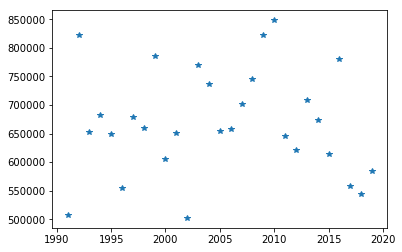

In [14]:
yearly_incidence = pd.Series(index=year,data = yearly_incidence)
yearly_incidence.plot(style='*')

In [15]:
yearly_incidence[yearly_incidence==max(yearly_incidence)]

2010    848236
dtype: int64

In [16]:
yearly_incidence[yearly_incidence==min(yearly_incidence)]

2002    502271
dtype: int64

In [17]:
yearly_incidence


1991    507329
1992    821558
1993    653058
1994    682920
1995    648598
1996    553859
1997    679308
1998    660316
1999    784963
2000    605096
2001    650660
2002    502271
2003    770211
2004    736266
2005    654308
2006    657482
2007    701566
2008    745701
2009    822819
2010    848236
2011    645042
2012    620315
2013    708874
2014    673458
2015    613286
2016    780645
2017    557449
2018    543281
2019    584926
dtype: int64

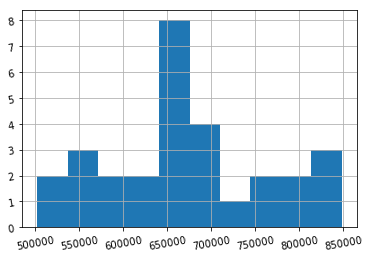

In [22]:
yearly_incidence.hist(xrot=10)